In [2]:
# =====================  1. 路径与常量  =====================

KGP_ped = "/mnt/NAS/Omics/DNA/1kGP/meta/20130606_g1k.ped"
vcf_path = "/mnt/qmtang/dev/hg38_chr22/Impute_chr22.Asia_shimao_on_major.strict.vcf.gz"

pop_anno = {
    "GWD":  {"中文":"冈比亚西部人",        "地区":"非洲/冈比亚",            "说明":"西非撒哈拉以南，班图语支"},
    "CHS":  {"中文":"中国南方汉族",        "地区":"亚洲/中国南方",         "说明":"中国汉族南方群体"},
    "TSI":  {"中文":"托斯卡纳人",          "地区":"欧洲/意大利",           "说明":"意大利中部托斯卡纳地区"},
    "PUR":  {"中文":"波多黎各人",          "地区":"美洲/波多黎各",         "说明":"拉丁裔，欧洲-非洲-美洲土著混合"},
    "JPT":  {"中文":"日本东京人",          "地区":"亚洲/日本",             "说明":"本州岛东部，大和族"},
    "IBS":  {"中文":"西班牙伊比利亚人",    "地区":"欧洲/西班牙",           "说明":"伊比利亚半岛土著"},
    "YRI":  {"中文":"尼日利亚约鲁巴人",    "地区":"非洲/尼日利亚",         "说明":"西非尼日尔-刚果语系"},
    "GIH":  {"中文":"印度古吉拉特人",      "地区":"亚洲/印度（古吉拉特）", "说明":"印度西部，印欧语系"},
    "FIN":  {"中文":"芬兰人",              "地区":"欧洲/芬兰",             "说明":"北欧乌拉尔语系，遗传瓶颈明显"},
    "CEU":  {"中文":"北欧白人（犹他）",    "地区":"欧洲/西北欧→美国",      "说明":"西北欧移民后裔（美国犹他州）"},
    "ITU":  {"中文":"印度泰卢固人",        "地区":"亚洲/印度（安得拉）",   "说明":"印度东南部，德拉维语系"},
    "STU":  {"中文":"印度泰米尔人",        "地区":"亚洲/印度（泰米尔纳德）","说明":"印度最南端，德拉维语系"},
    "KHV":  {"中文":"越南京族人",          "地区":"亚洲/越南",             "说明":"越南北部，南亚语系→越芒语支"},
    "CHB":  {"中文":"中国北方汉族",        "地区":"亚洲/中国北方",         "说明":"中国汉族北方群体"},
    "LWK":  {"中文":"肯尼亚卢赫雅人",      "地区":"非洲/肯尼亚",           "说明":"东非班图语支"},
    "ESN":  {"中文":"尼日利亚埃桑人",      "地区":"非洲/尼日利亚",         "说明":"尼日尔-刚果语系，西非"},
    "ACB":  {"中文":"加勒比非裔",          "地区":"美洲/加勒比→非洲",      "说明":"非洲奴隶贸易后裔（加勒比地区）"},
    "PJL":  {"中文":"印度旁遮普人",        "地区":"亚洲/印度（旁遮普）",   "说明":"印度西北部，印欧语系"},
    "GBR":  {"中文":"英国英格兰人",        "地区":"欧洲/英国",             "说明":"大不列颠岛土著"},
    "CLM":  {"中文":"哥伦比亚麦德林人",    "地区":"美洲/哥伦比亚",         "说明":"拉丁裔，欧洲-美洲土著-非洲混合"},
    "CDX":  {"中文":"中国西双版纳傣族人",  "地区":"亚洲/中国云南",         "说明":"傣泰民族，侗台语系"},
    "MSL":  {"中文":"塞拉利昂门德人",      "地区":"非洲/塞拉利昂",         "说明":"西非曼德语支"},
    "PEL":  {"中文":"秘鲁利马人",          "地区":"美洲/秘鲁",             "说明":"拉丁裔，克丘亚-欧洲混合"},
    "BEB":  {"中文":"孟加拉国人",          "地区":"亚洲/孟加拉国",         "说明":"孟加拉湾沿岸，印欧语系"},
    "MXL":  {"中文":"墨西哥洛杉矶人",      "地区":"美洲/墨西哥→美国",      "说明":"拉丁裔，美洲土著-欧洲混合"},
    "ASW":  {"中文":"非裔美国人",          "地区":"美洲/美国",             "说明":"非洲奴隶贸易后裔（美国南部）"},
}
pop_anno['Ancient'] = {
    "中文": "古DNA",
    "地区": "亚洲/古DNA",
    "说明": "VCF 中存在但 1kGP ped 中找不到的样本统一标记为古DNA"
}

In [3]:
# =====================  2. 读取样本列表并打标签  =====================
import pandas as pd
from cyvcf2 import VCF

vcf    = VCF(vcf_path)
vcf_samples = set(vcf.samples)
vcf.close()

# 读取 1kGP ped
ped_df = pd.read_csv(KGP_ped, sep='\t')

# 构造“个体→人群”映射：1kGP 样本用 ped 中 Population；其余统一标记 Ancient
ind2pop = {}
for ind in vcf_samples:
    pop = ped_df.loc[ped_df['Individual ID']==ind, 'Population']
    ind2pop[ind] = pop.iloc[0] if not pop.empty else 'Ancient'

In [4]:
# =====================  3. 把人群标签写进 pop_df  =====================
import allel
callset   = allel.read_vcf(vcf_path)
sample_id = callset['samples']
pop_vec   = [ind2pop[s] for s in sample_id]
pop_df    = pd.DataFrame({'sample': sample_id, 'pop': pop_vec})
pop_df

,sample,pop
0,HG01879,ACB
1,HG01880,ACB
2,HG01881,ACB
3,HG01882,ACB
4,HG01883,ACB
...,...,...
4521,HRR1941628,Ancient
4522,HRR1941629,Ancient
4523,HRR1941630,Ancient
4524,HRR1941631,Ancient


In [5]:
from Bio import Phylo
import allel
import pandas as pd
import numpy as np
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
import matplotlib.pyplot as plt
# ---------------- 2. 基因型 ----------------
gt = allel.GenotypeArray(callset['calldata/GT']).to_n_alt()

# ---------------- 3. 人群索引 ----------------
pops        = sorted(pop_df['pop'].unique())
pop_idx_lst = [pop_df[pop_df['pop']==p].index.values for p in pops]

# ---------------- 4. Fst 距离矩阵 ----------------
def fst_weir_cockerham(gn, idx1, idx2):
    n1, n2 = len(idx1), len(idx2)
    ac1 = gn[:, idx1].sum(axis=1)
    ac2 = gn[:, idx2].sum(axis=1)
    an1, an2 = n1*2, n2*2
    p1, p2 = ac1/an1, ac2/an2
    num = (p1 - p2)**2 - (p1*(1-p1))/(an1-1) - (p2*(1-p2))/(an2-1)
    den = (p1*(1-p2) + p2*(1-p1))/2
    den[den<=0] = np.nan
    return np.nanmean(num / den)

n_pop = len(pops)
fst_mat = np.zeros((n_pop, n_pop))
for i in range(n_pop):
    for j in range(i+1, n_pop):
        fst_ij = fst_weir_cockerham(gt, pop_idx_lst[i], pop_idx_lst[j])
        fst_mat[i,j] = fst_mat[j,i] = fst_ij
dist_df = pd.DataFrame(fst_mat, index=pops, columns=pops)

matrix = [dist_df.iloc[i, :i+1].tolist() for i in range(n_pop)]
dm     = DistanceMatrix(pops, matrix)
tree   = DistanceTreeConstructor().nj(dm)
tree.root_with_outgroup(['Ancient'])   # 关键一行

# 中文标签映射（含古DNA）
pop_chn = {k: v["中文"] for k, v in pop_anno.items()}

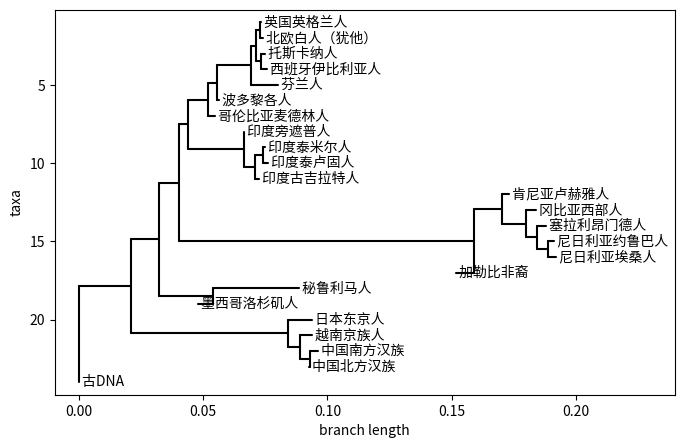

In [6]:
from matplotlib import font_manager
font_path = "/home/qmtang/.fonts/NotoSansCJKsc-Regular.otf"          # 刚下载的文件
font_manager.fontManager.addfont(font_path)      # 动态注册
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (8, 5)
Phylo.draw(
    tree,
    label_func=lambda clade: pop_chn.get(clade.name, "") if clade.is_terminal() else None,
    branch_labels=None
)
plt.show()